In [66]:
weather = '/home/vant/Escritorio/MasterDataScience/Clases/Python/weather_year.csv'

In [67]:
%%time
!cat {weather} |wc -l

367
CPU times: user 8.11 ms, sys: 250 µs, total: 8.36 ms
Wall time: 112 ms


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
pd.options.display.max_columns = None

dfw = pd.read_csv(weather, parse_dates=[0])
dfw.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-03-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22.0,0.00,0,NaN,202


In [70]:
#dfw.count() = nos da los datos disponibles en cada columna y puede ser una buena aproximacion a si hay NaN
#dfw.describe() = nos da datos estadisticos importantes por cada columna, cuando vayamos desagregando datos nos serviran para modelos estadisticos
#dfw.shape = interesante para conocer las dimensiones del df totales lineas y columnas
#dfw.ndim = dimension del df 
#dfw.dtypes =  conocer si una columna es integer,float o string
dfw.dtypes

EDT                           datetime64[ns]
Max TemperatureF                       int64
Mean TemperatureF                      int64
Min TemperatureF                       int64
Max Dew PointF                         int64
MeanDew PointF                         int64
Min DewpointF                          int64
Max Humidity                           int64
 Mean Humidity                         int64
 Min Humidity                          int64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                   int64
 Mean VisibilityMiles                  int64
 Min VisibilityMiles                   int64
 Max Wind SpeedMPH                     int64
 Mean Wind SpeedMPH                    int64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                            int64
 Events                               object
 WindDirDe

In [71]:
dfw1 = dfw[['EDT', 'Mean TemperatureF', ' Mean Humidity',' Events', ' WindDirDegrees']]
dfw1.head()
#Con la idea de seguir buscando relacion entre la direccion del viento, temperatura y la humedad con la nieve

,EDT,Mean TemperatureF,Mean Humidity,Events,WindDirDegrees
0,2012-03-10,40,50,NaN,138
1,2012-03-11,49,53,Rain,163
2,2012-03-12,62,76,Rain,190
3,2012-03-13,63,66,NaN,242
4,2012-03-14,62,68,NaN,202


In [72]:
dfw2 = dfw1[dfw1[' Events'].isin(['Snow', 'Fog-Snow'])]

In [73]:
dfw2.head()

,EDT,Mean TemperatureF,Mean Humidity,Events,WindDirDegrees
286,2012-12-21,26,74,Fog-Snow,285
291,2012-12-26,31,81,Fog-Snow,16
293,2012-12-28,31,80,Snow,119
294,2012-12-29,28,80,Fog-Snow,308
296,2012-12-31,31,78,Fog-Snow,228


In [74]:
dfw2.describe()
#hay un dato que llama la atencion en la direccion del viento, el 75% de los casos esta en valores >207 

,Mean TemperatureF,Mean Humidity,WindDirDegrees
count,18.000000,18.000000,18.000000
mean,26.277778,72.888889,234.777778
std,6.210101,9.779263,95.580305
min,11.000000,50.000000,16.000000
25%,22.500000,67.750000,207.750000
50%,27.000000,73.000000,257.500000
75%,31.000000,80.000000,291.000000
max,36.000000,87.000000,351.000000


In [75]:
dfw2.index = dfw2['EDT']

In [76]:
dfw2.head()

,EDT,Mean TemperatureF,Mean Humidity,Events,WindDirDegrees
EDT,,,,,
2012-12-21,2012-12-21,26,74,Fog-Snow,285
2012-12-26,2012-12-26,31,81,Fog-Snow,16
2012-12-28,2012-12-28,31,80,Snow,119
2012-12-29,2012-12-29,28,80,Fog-Snow,308
2012-12-31,2012-12-31,31,78,Fog-Snow,228


In [77]:
dfw2 = dfw2.drop('EDT', axis=1)
#da error porque lo he corrido una vez ya y esa columna por lo tanto ya no existe


In [78]:
dfw2.head()

,Mean TemperatureF,Mean Humidity,Events,WindDirDegrees
EDT,,,,
2012-12-21,26,74,Fog-Snow,285
2012-12-26,31,81,Fog-Snow,16
2012-12-28,31,80,Snow,119
2012-12-29,28,80,Fog-Snow,308
2012-12-31,31,78,Fog-Snow,228


In [79]:
# Vamos a empezar a pasar la temperatura de Farenheit a Centigrados, creamos una funcion y luego la aplicamos sobre las columnas de temperatura

def conver_F(f):
    return (f - 32) / 1.8

conver_F(72)

22.22222222222222

In [80]:
# Para saber y poder visualizar mejor si la direccion del viento afecta a la mayoria de dias que nieva, la informacion actual es dificil de comprender.
# Voy a generar una segunda funcion que permita aglutinar los vientos por 1: (316 - 45 grados) 2: Este (46 -135)
# 3: Sur (136-225) 4: Oeste (226-315) 

def conver_W(wind):
    
    if wind in range(0,46):
        return 1
    elif wind in range(46,136):
        return 2
    elif wind in range(136,226):
        return 3
    elif wind in range(226,316):
        return 4
    else:
        return 1
conver_W(0)


1

In [81]:
dfw2['Mean TemperatureC'] = dfw2['Mean TemperatureF'].apply(conver_F)
dfw2.head()

,Mean TemperatureF,Mean Humidity,Events,WindDirDegrees,Mean TemperatureC
EDT,,,,,
2012-12-21,26,74,Fog-Snow,285,-3.333333
2012-12-26,31,81,Fog-Snow,16,-0.555556
2012-12-28,31,80,Snow,119,-0.555556
2012-12-29,28,80,Fog-Snow,308,-2.222222
2012-12-31,31,78,Fog-Snow,228,-0.555556


In [82]:
dfw2[' WindDirDegrees'] = dfw2[' WindDirDegrees'].apply(conver_W)
dfw2.head()

,Mean TemperatureF,Mean Humidity,Events,WindDirDegrees,Mean TemperatureC
EDT,,,,,
2012-12-21,26,74,Fog-Snow,4,-3.333333
2012-12-26,31,81,Fog-Snow,1,-0.555556
2012-12-28,31,80,Snow,2,-0.555556
2012-12-29,28,80,Fog-Snow,4,-2.222222
2012-12-31,31,78,Fog-Snow,4,-0.555556


In [83]:
dfw2 = dfw2.drop('Mean TemperatureF', axis=1)

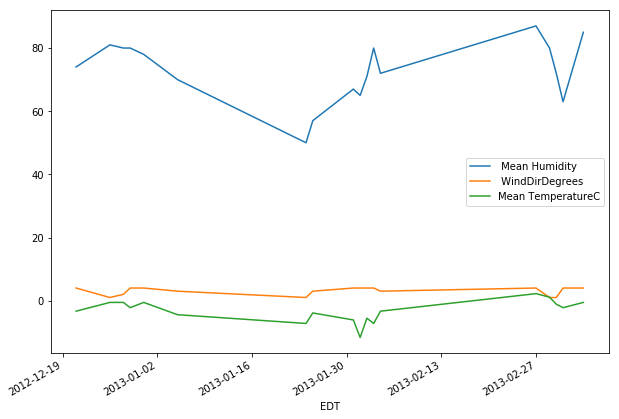

In [84]:
dfw2.plot(figsize=(10,7));

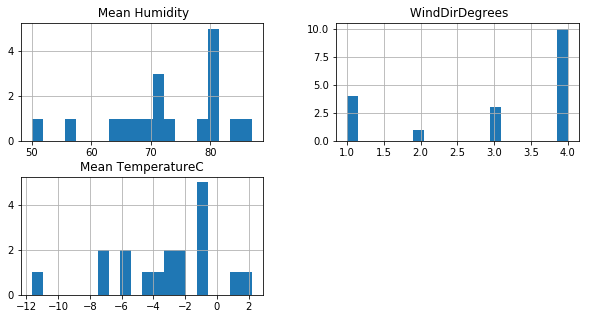

In [85]:
dfw2.hist(figsize=(10,5), bins=20);

/home/vant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



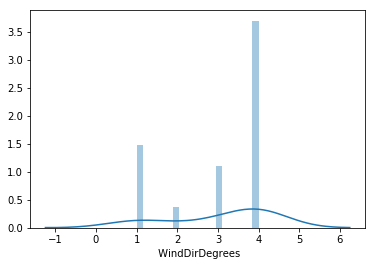

In [86]:
import seaborn as sns

sns.distplot(dfw2[' WindDirDegrees'], bins=20);

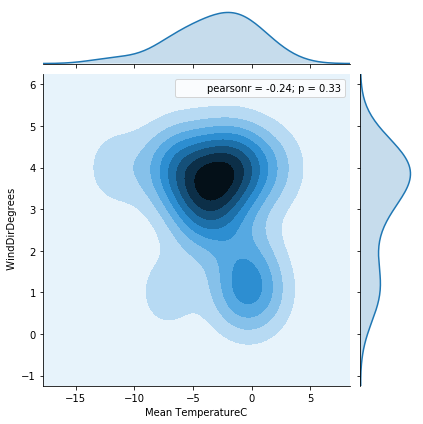

In [87]:
sns.jointplot(data=dfw2, x='Mean TemperatureC', y=' WindDirDegrees', kind='kde');

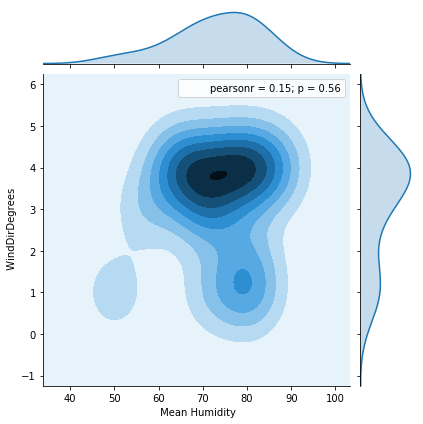

In [88]:
sns.jointplot(data=dfw2, x=' Mean Humidity', y=' WindDirDegrees', kind='kde');

In [94]:
dfw3 = dfw2[dfw2[' WindDirDegrees'] >= 3]

In [95]:
dfw3.head()

,Mean Humidity,Events,WindDirDegrees,Mean TemperatureC
EDT,,,,
2012-12-21,74,Fog-Snow,4,-3.333333
2012-12-29,80,Fog-Snow,4,-2.222222
2012-12-31,78,Fog-Snow,4,-0.555556
2013-01-05,70,Snow,3,-4.444444
2013-01-25,57,Snow,3,-3.888889


In [100]:
dfw4 = dfw3.reset_index()
dfw4.head()

,EDT,Mean Humidity,Events,WindDirDegrees,Mean TemperatureC
0,2012-12-21,74,Fog-Snow,4,-3.333333
1,2012-12-29,80,Fog-Snow,4,-2.222222
2,2012-12-31,78,Fog-Snow,4,-0.555556
3,2013-01-05,70,Snow,3,-4.444444
4,2013-01-25,57,Snow,3,-3.888889


In [101]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

plotly.offline.init_notebook_mode(connected=True)


trace1 = {"x": dfw4['EDT'], 
          "y": dfw4['Mean TemperatureC'], 
          "marker": {"color": "red", "size": 12}, 
          "mode": "markers", 
          "name": "MeanC", 
          "type": "scatter"
}

trace2 = {"x": dfw4['EDT'], 
          "y": dfw4[' Mean Humidity'], 
          "marker": {"color": "blue", "size": 12}, 
          "mode": "markers", 
          "name": "MeanH", 
          "type": "scatter", 
}

data = [trace1, trace2]
layout = {"title": "Snowing at San Francisco", 
          "xaxis": {"title": "Days", }, 
          "yaxis": {"title": "MeanVariable"}}

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='basicplotly_try2')

In [ ]:
#Siguiente objetivo aplicar modelos de regresion lineal para estimar temperatura media y humedad media en dias 
#de nieve con viento sur y este segun epoca del año